MEDICAL COST ANALYSIS WITH LINEAR REGRESSION

In [2]:
# Importing neccessary library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
# We read data
ins = pd.read_csv("insurance.csv")
df = ins.copy()
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# We get info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# We look there is any null data
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# We look inside of smoker columm
df["smoker"]

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

Below are the graphs where data is collected and comparisons are made

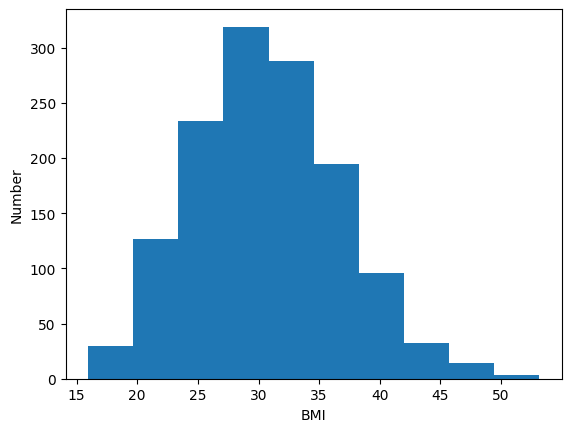

In [7]:
# Histogram
plt.hist(df["bmi"])
plt.xlabel("BMI")
plt.ylabel("Number")
plt.show()

Text(0.5, 1.0, 'Violin plot of Charges vs smoker')

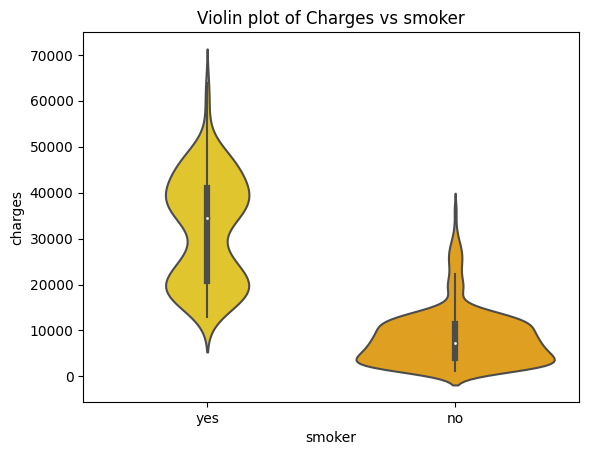

In [8]:
# Violin Plot
sns.violinplot(x='smoker', y='charges',data=df,palette='Wistia')
plt.title('Violin plot of Charges vs smoker')

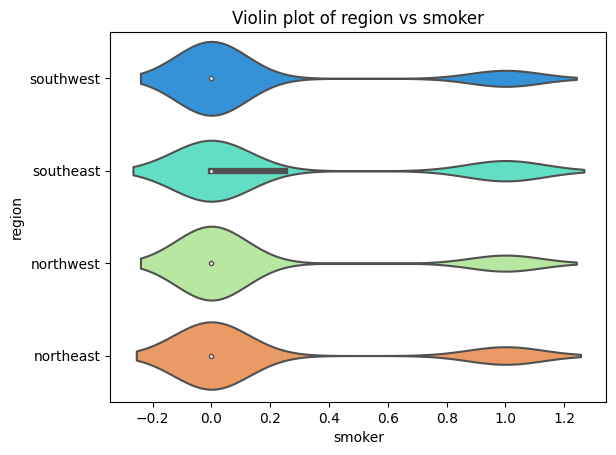

In [9]:
# Violin Plot
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
sns.violinplot(x='smoker', y='region',data=df,palette='rainbow',split=True)
plt.title('Violin plot of region vs smoker');

Text(0.5, 1.0, 'Violin plot of bmi vs sex')

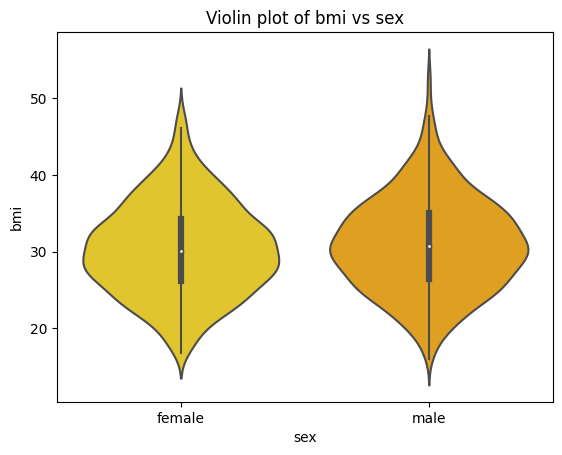

In [10]:
# Violin Plot
sns.violinplot(x='sex', y='bmi',data=df,palette='Wistia')
plt.title('Violin plot of bmi vs sex')

In [11]:
# We find maximum chil number of every region
for region in df["region"].unique():
    max_childrens = df[df["region"] == region]['children'].max()
    print(f"Region: {region}, Max Childrens: {max_childrens}")

Region: southwest, Max Childrens: 5
Region: southeast, Max Childrens: 5
Region: northwest, Max Childrens: 5
Region: northeast, Max Childrens: 5


Text(0.5, 1.0, 'Scatter plot of bmi vs age')

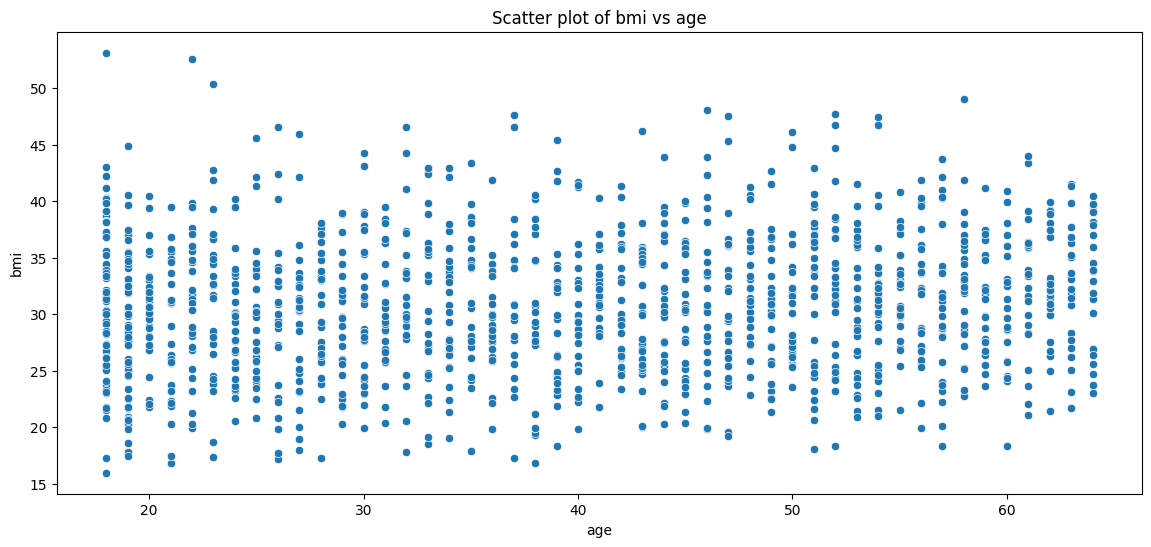

In [12]:
# Scatter PLot
f = plt.figure(figsize=(14,6))
sns.scatterplot(x='age',y='bmi',data=df)
plt.title('Scatter plot of bmi vs age')

Text(0.5, 1.0, 'Scatter plot of bmi vs children')

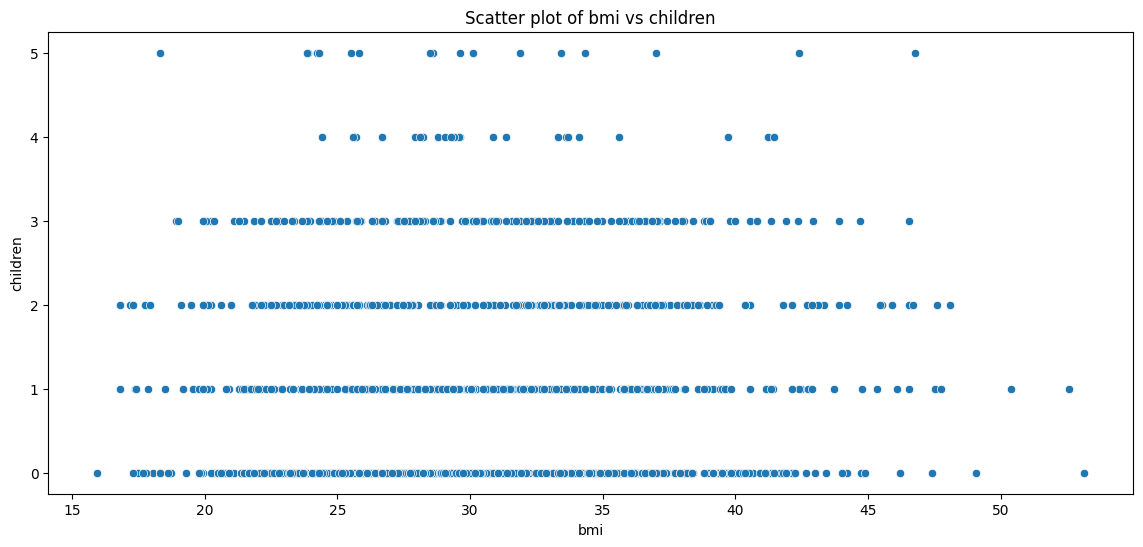

In [26]:
# Scatter PLot
f = plt.figure(figsize=(14,6))
sns.scatterplot(x='bmi',y='children',data=df)
plt.title('Scatter plot of bmi vs children')

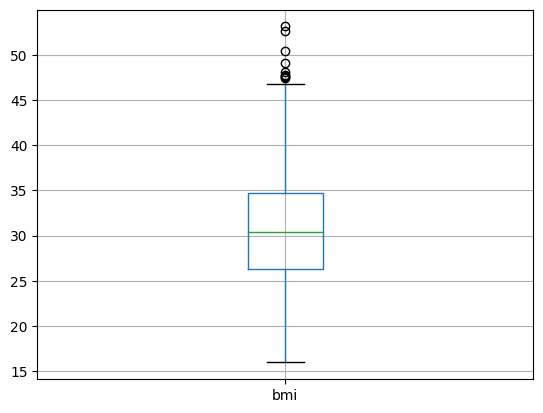

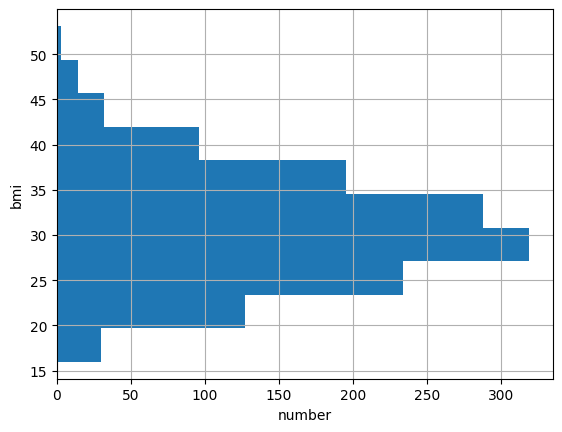

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [14]:
# Kutu grafiği
df.boxplot('bmi')
plt.show()

# Dağılım grafiği
df['bmi'].hist(orientation="horizontal")
plt.ylabel("bmi")
plt.xlabel("number")
plt.show()

df["bmi"].describe()

There are potential outliners, the points above boxplot q3 indicate potential outliers. The 75% and max difference between the data supports this.

Text(0.5, 1.0, 'Scatter plot of Charges vs bmi')

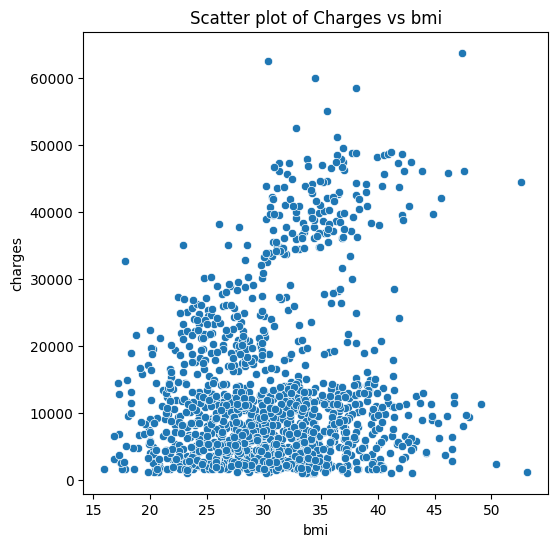

In [15]:
# Scatter Plot
plt.figure(figsize=(6,6))
sns.scatterplot(x='bmi',y='charges',data=df)
plt.title('Scatter plot of Charges vs bmi')

Text(0.5, 1.0, 'Scatter plot of region vs bmi')

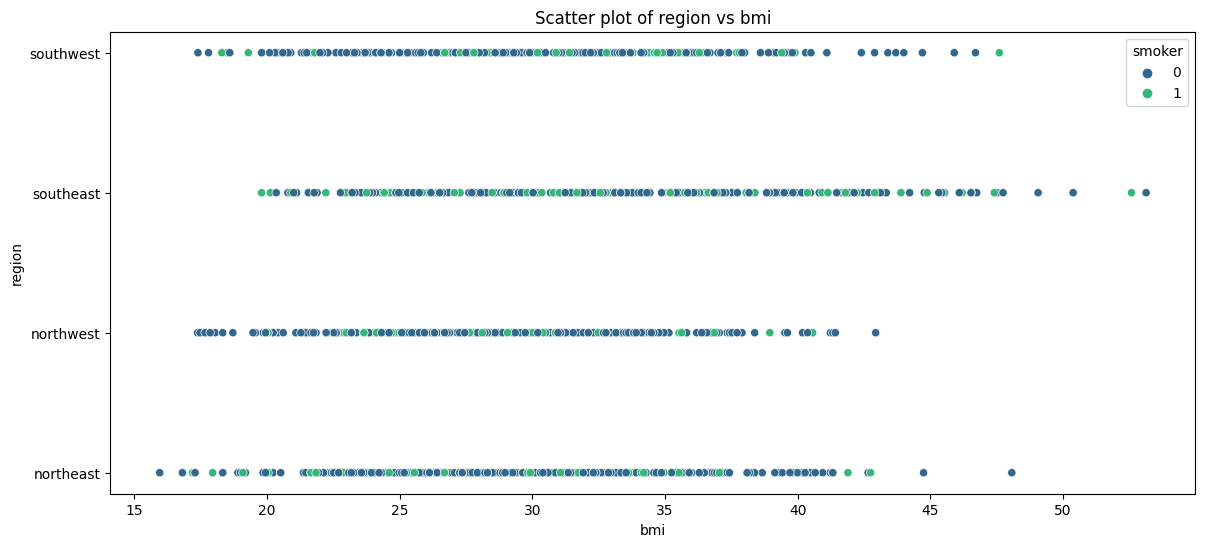

In [16]:
# Scatter Plot
plt.figure(figsize=(14,6))
sns.scatterplot(x='bmi',y='region',data=df,palette='viridis',hue='smoker')
plt.title('Scatter plot of region vs bmi')

In [17]:
# We select variable
X = df.drop('charges',axis=1) # Independet variable
y = df['charges'] # dependent variable

In [18]:
# We apply OneHotEncoder to categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(X[["sex", "region", "smoker"]]).toarray()
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(["sex", "region", "smoker"]))
X = pd.concat([X, encoded_df], axis=1)
X.drop(["sex", "region", "smoker"], axis=1, inplace=True)

In [19]:
# We split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=30)

In [20]:
# We standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# We use linear regression
model = LinearRegression()
model

LinearRegression()

In [22]:
# We fit model
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [23]:
# We define hyperparameter grid for tuning
param_grid = {
    'fit_intercept': [True, False]
}

In [24]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

best_params

{'fit_intercept': True}

In [25]:
# Evaluate the best model using cross-validation on the test set
best_predictions = best_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, best_predictions)
mae = mean_absolute_error(y_test, best_predictions)
r2 = r2_score(y_test, best_predictions)

# We print evaluation metrics
print("Mean Squared Error (MSE) on Test Set:", mse)
print("Mean Absolute Error (MAE) on Test Set:", mae)
print("R-squared (R2) on Test Set:", r2)

Mean Squared Error (MSE) on Test Set: 34386744.29631844
Mean Absolute Error (MAE) on Test Set: 4070.9423869282464
R-squared (R2) on Test Set: 0.7804250531063247
